In [1]:
pip install kaggle

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

 98% 266M/271M [00:04<00:00, 94.7MB/s]
100% 271M/271M [00:04<00:00, 69.7MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 78.4MB/s]
 97% 529M/543M [00:05<00:00, 75.8MB/s]
100% 543M/543M [00:05<00:00, 97.7MB/s]


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [0]:
import zipfile

file_name="train.zip"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(file_name,'r') as z:
    z.extractall(".")

In [0]:
import zipfile

file_name="test1.zip"

# Will unzip the files so that you can see them..
with zipfile.ZipFile(file_name,'r') as z:
    z.extractall(".")

In [0]:
#from subprocess import check_output
#print(check_output(["ls", "train"]).decode("utf8"))

In [0]:
#from subprocess import check_output
#print(check_output(["ls", "test1"]).decode("utf8"))

In [0]:
path_img_test1 = '/content/test1'

In [0]:
path_img_train='/content/train' 

In [15]:
print(path_img_train)

/content/train


In [16]:
fname=get_image_files(path_img_train)
fname[:5]

[PosixPath('/content/train/cat.10224.jpg'),
 PosixPath('/content/train/cat.290.jpg'),
 PosixPath('/content/train/cat.422.jpg'),
 PosixPath('/content/train/dog.12366.jpg'),
 PosixPath('/content/train/dog.35.jpg')]

In [0]:
labels = [('cat' if 'cat' in str(x) else 'dog') for x in fname]

In [18]:
print(type(labels))

<class 'list'>


In [19]:
data = ImageDataBunch.from_lists(path_img_train, fname, ds_tfms=get_transforms(), size=224, bs=64, labels = labels)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,dog,cat,dog
Path: /content/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,dog,dog,dog,cat
Path: /content/train;

Test: None

In [20]:
print(data.classes)

['cat', 'dog']


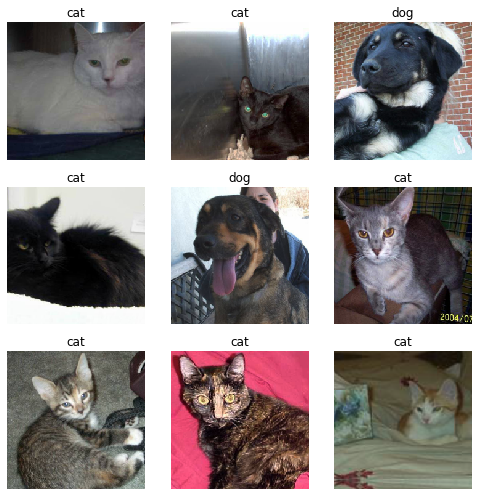

In [21]:
data.show_batch(rows=3,figsize=(7,7))

In [22]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 29.4MB/s]


In [24]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,0.010978,0.017678,0.995800,03:57
1,0.017422,0.020847,0.994400,03:59
2,0.018005,0.018285,0.994800,04:01
3,0.010834,0.032953,0.994000,04:02
4,0.011724,0.019421,0.994800,04:04
5,0.008457,0.019981,0.995000,04:04
6,0.004891,0.018246,0.995000,04:04
7,0.006117,0.017543,0.996000,04:04


In [0]:
learn.save('stage-1')

In [26]:
interp = ClassificationInterpretation.from_learner(learn)

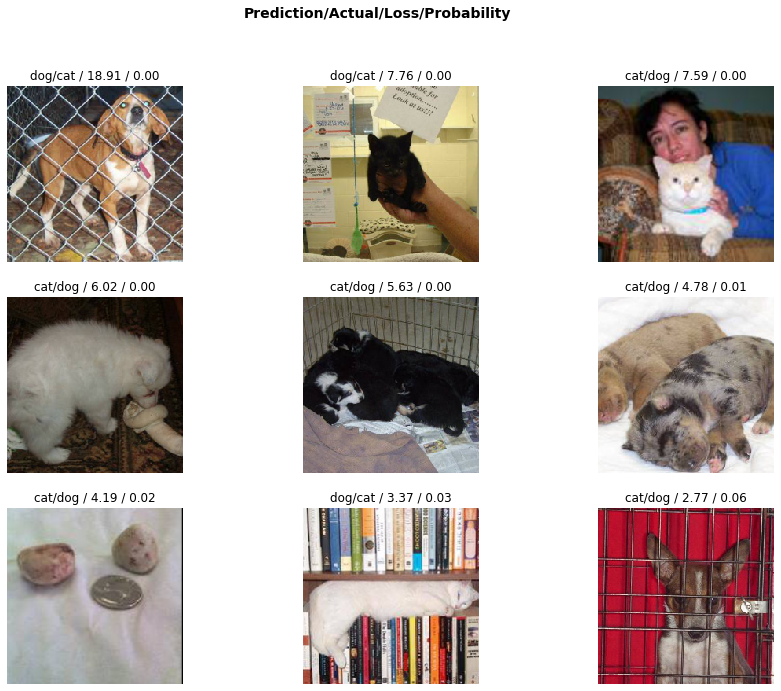

In [27]:
interp.plot_top_losses(9,figsize=(15,11))

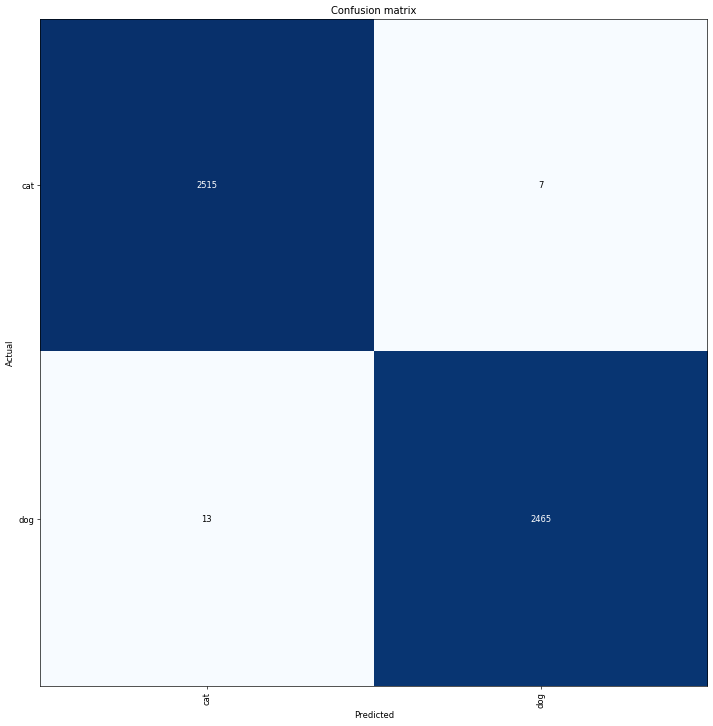

In [28]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


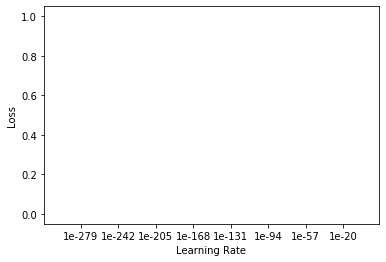

In [30]:
learn.recorder.plot()